In [23]:
import pandas as pd

# Importing the data as df and repeating the cleaning steps
df = pd.read_csv("cleaned_dataset.csv")
df.head()

,Supplier,Booking_Code,Pickup_&_Dropoff_Point,Car_Brand_Model,Number_of_Car,Currency,Net_Selling_Price,Total_Promo_Price,Net_Sales,Booking_Type,...,Pickup_Time_Hour,Pickup_Time_Minute,Issuance_Time_Hour,Issuance_Time_Minute,Pickup_Date_Year,Pickup_Date_Month,Pickup_Date_Day,Issuance_Date_Year,Issuance_Date_Month,Issuance_Date_Day
0,Gratia;Holiday,28U2RPQGM14,CGK-Gambir,Gratia Holiday Budget MPV,1,IDR,146400,0.0,146400.0,ADVANCE_BOOKING,...,21,0,0,2,2024,4,1,2024,4,1
1,Gratia;Holiday,68U2RWXH317,Gambir-CGK,Gratia Holiday Budget MPV,1,IDR,140800,0.0,140800.0,ADVANCE_BOOKING,...,5,0,0,10,2024,4,3,2024,4,1
2,Gratia;Holiday,68U2T4WI152,CGK-Kelapa Gading,Gratia Holiday Budget MPV,1,IDR,146400,0.0,146400.0,ADVANCE_BOOKING,...,10,40,0,51,2024,4,1,2024,4,1
3,Gratia;Holiday,08U2TVD3K61,Duren Sawit-CGK,Gratia Holiday Budget MPV,1,IDR,173600,0.0,173600.0,ADVANCE_BOOKING,...,8,45,1,4,2024,4,1,2024,4,1
4,Gratia;Holiday,38U3AJ4CD09,Kelapa Gading-CGK,Gratia Holiday Budget MPV,1,IDR,140800,0.0,140800.0,ADVANCE_BOOKING,...,9,10,4,3,2024,4,1,2024,4,1


C:\Users\USER\AppData\Local\Temp\ipykernel_8344\377512962.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_routes, x='Number_of_Bookings', y='Route', palette='Blues_d')


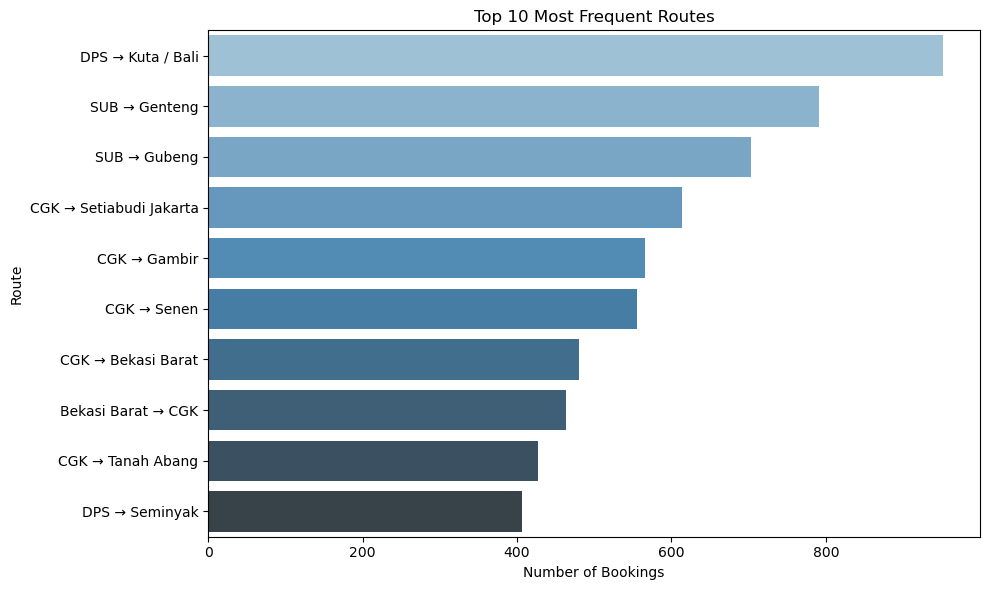

In [24]:
# Step 1: Extract Pickup and Dropoff points from the route column
if 'Pickup_&_Dropoff_Point' in df.columns:
    df[['Pickup_Point', 'Dropoff_Point']] = df['Pickup_&_Dropoff_Point'].str.split('-', n=1, expand=True)

# Create a clean Route label
df['Route'] = df['Pickup_Point'].str.strip() + " → " + df['Dropoff_Point'].str.strip()

# Top 10 most frequent routes
top_routes = df['Route'].value_counts().head(10).reset_index()
top_routes.columns = ['Route', 'Number_of_Bookings']

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the top 10 routes
plt.figure(figsize=(10, 6))
sns.barplot(data=top_routes, x='Number_of_Bookings', y='Route', palette='Blues_d')
plt.title('Top 10 Most Frequent Routes')
plt.xlabel('Number of Bookings')
plt.ylabel('Route')
plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_8344\4103279501.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_revenue_routes, x='Total_Revenue', y='Route', palette='Greens_d')


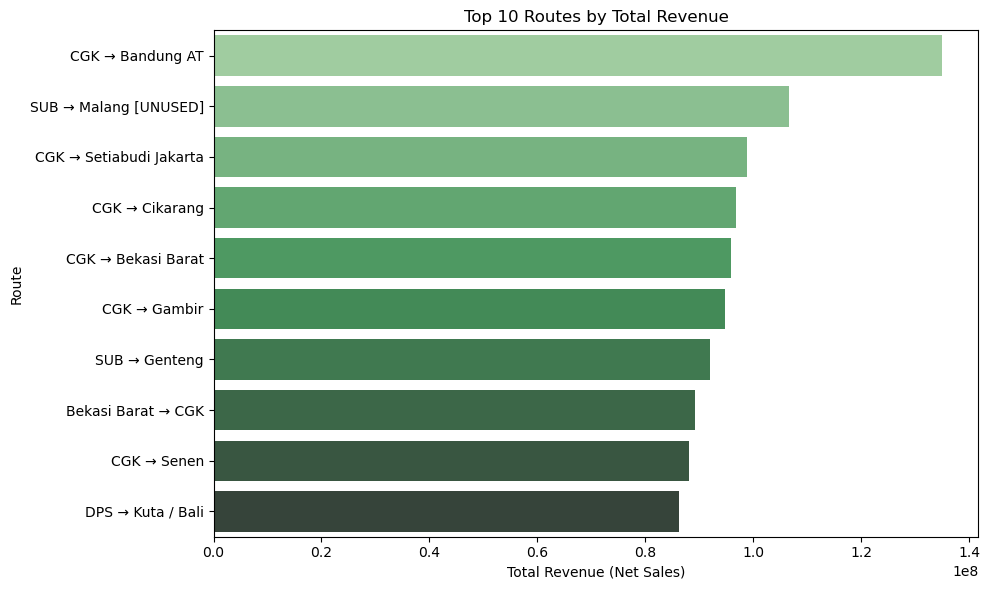

In [25]:
# Step 2: Top 10 Routes by Total Revenue (Net Sales)

# Group by route and sum the Net Sales
top_revenue_routes = (
    df.groupby('Route')['Net_Sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

top_revenue_routes.columns = ['Route', 'Total_Revenue']

# Plot the top revenue-generating routes
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=top_revenue_routes, x='Total_Revenue', y='Route', palette='Greens_d')
plt.title('Top 10 Routes by Total Revenue')
plt.xlabel('Total Revenue (Net Sales)')
plt.ylabel('Route')
plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_8344\983233163.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_suppliers, x='Number_of_Bookings', y='Supplier', palette='Blues_d')


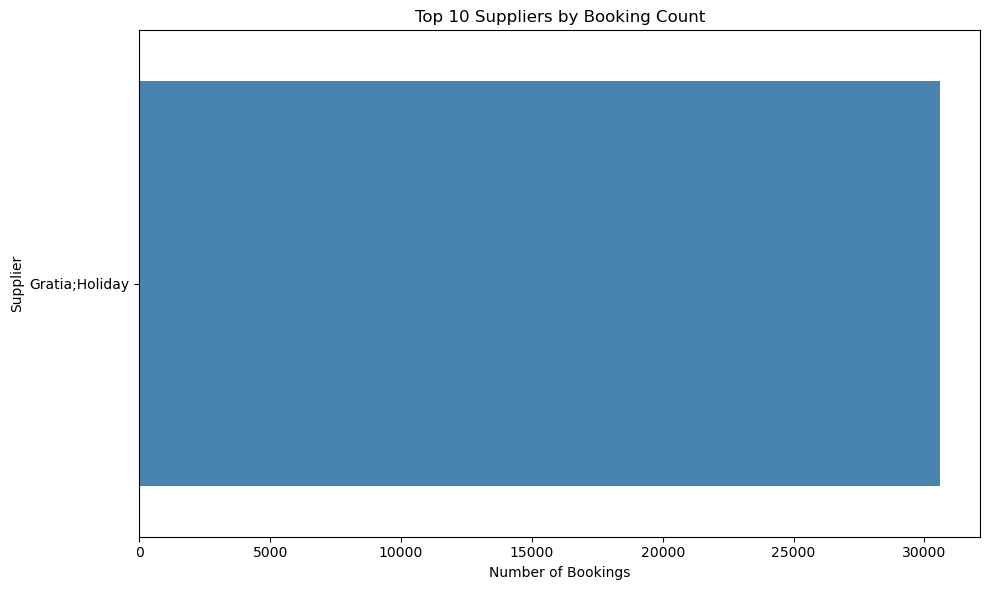

In [26]:
# Let's now analyze the 'Supplier' column

# Top 10 most frequent suppliers
top_suppliers = df['Supplier'].value_counts().head(10).reset_index()
top_suppliers.columns = ['Supplier', 'Number_of_Bookings']

# Plot the top suppliers
plt.figure(figsize=(10, 6))
sns.barplot(data=top_suppliers, x='Number_of_Bookings', y='Supplier', palette='Blues_d')
plt.title('Top 10 Suppliers by Booking Count')
plt.xlabel('Number of Bookings')
plt.ylabel('Supplier')
plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_8344\1006539698.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=booking_type_counts, x='Booking_Type', y='Count', palette='Set2')


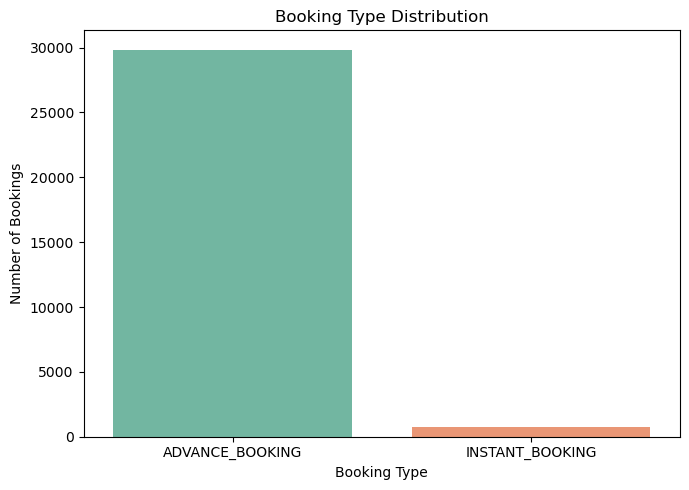

In [27]:
# Now analyze the 'Booking_Type' column (e.g., Instant vs Advance)

booking_type_counts = df['Booking_Type'].value_counts().reset_index()
booking_type_counts.columns = ['Booking_Type', 'Count']

# Plot
plt.figure(figsize=(7, 5))
sns.barplot(data=booking_type_counts, x='Booking_Type', y='Count', palette='Set2')
plt.title('Booking Type Distribution')
plt.xlabel('Booking Type')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()


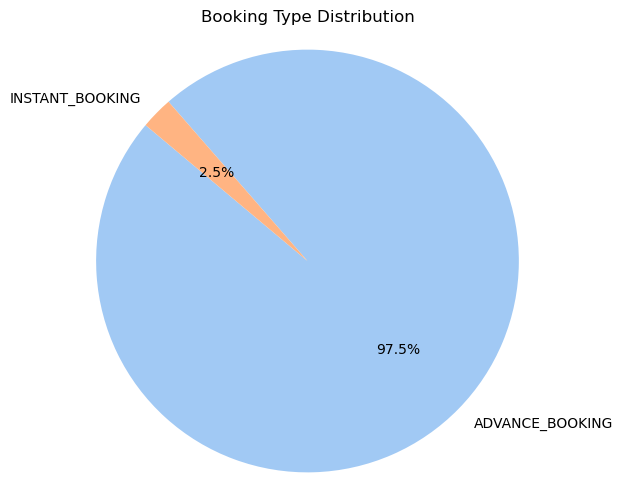

In [28]:
# Pie Chart: Booking Type Distribution

booking_type_counts = df['Booking_Type'].value_counts()

# Plot
plt.figure(figsize=(6, 6))
plt.pie(booking_type_counts, labels=booking_type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Booking Type Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_8344\1006250775.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_models, x='Count', y='Car_Brand_Model', palette='Purples_d')


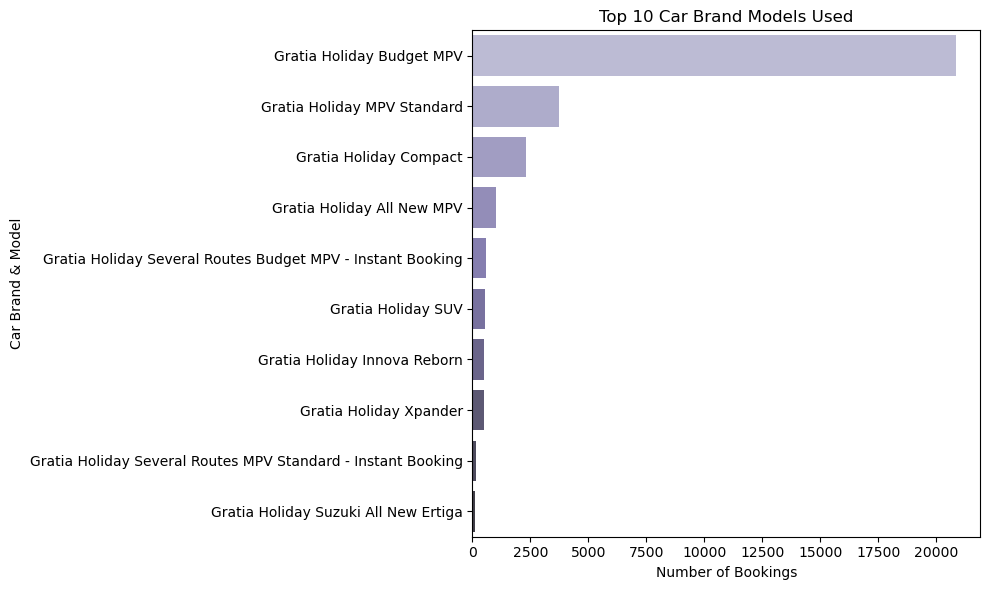

In [29]:
# Analyze the 'Car_Brand_Model' column — Top 10 most frequently used vehicle models

top_models = df['Car_Brand_Model'].value_counts().head(10).reset_index()
top_models.columns = ['Car_Brand_Model', 'Count']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_models, x='Count', y='Car_Brand_Model', palette='Purples_d')
plt.title('Top 10 Car Brand Models Used')
plt.xlabel('Number of Bookings')
plt.ylabel('Car Brand & Model')
plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_8344\2992109670.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Booking_Type', y='Net_Sales', palette='Set3')


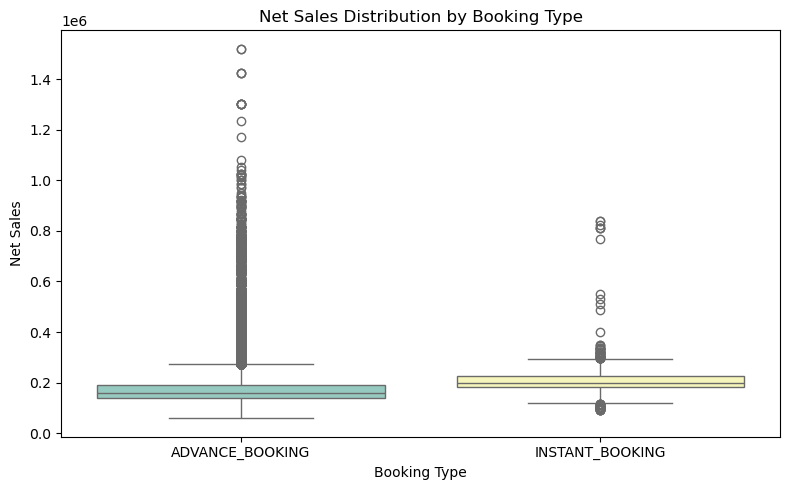

In [30]:
# Compare Net Sales by Booking Type using a boxplot

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Booking_Type', y='Net_Sales', palette='Set3')
plt.title('Net Sales Distribution by Booking Type')
plt.xlabel('Booking Type')
plt.ylabel('Net Sales')
plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_8344\641929851.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='Net_Sales', y='Car_Brand_Model', palette='coolwarm')


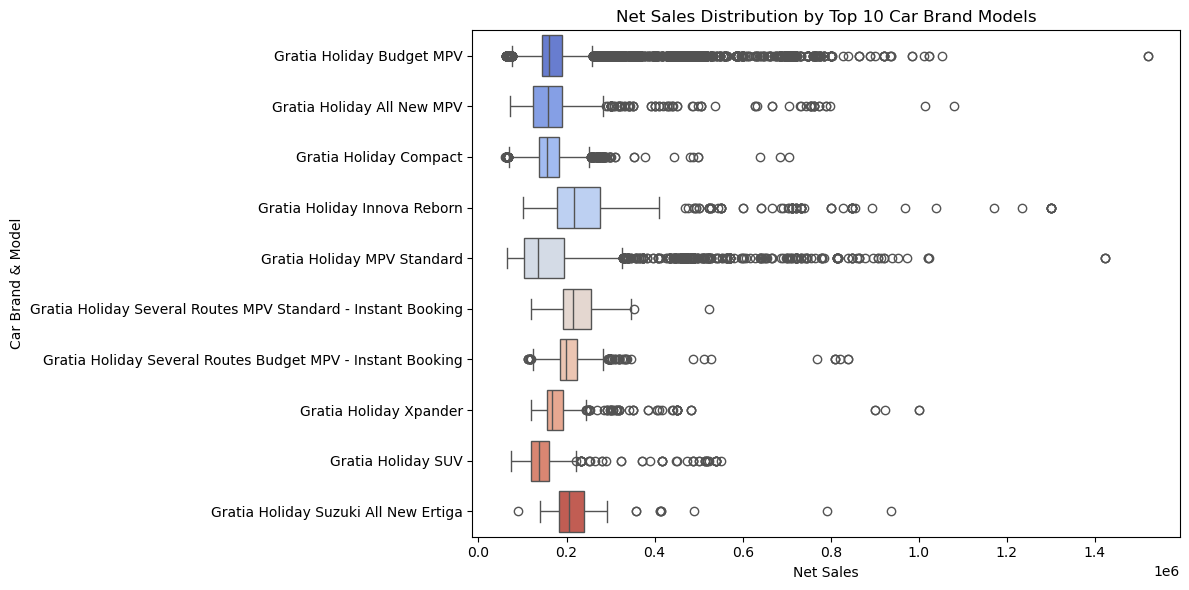

In [31]:
# Compare Net Sales by Car Brand Model (Top 10 only for readability)

# First, get top 10 car models by frequency
top_model_names = df['Car_Brand_Model'].value_counts().head(10).index
filtered_df = df[df['Car_Brand_Model'].isin(top_model_names)]

# Create boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='Net_Sales', y='Car_Brand_Model', palette='coolwarm')
plt.title('Net Sales Distribution by Top 10 Car Brand Models')
plt.xlabel('Net Sales')
plt.ylabel('Car Brand & Model')
plt.tight_layout()
plt.show()


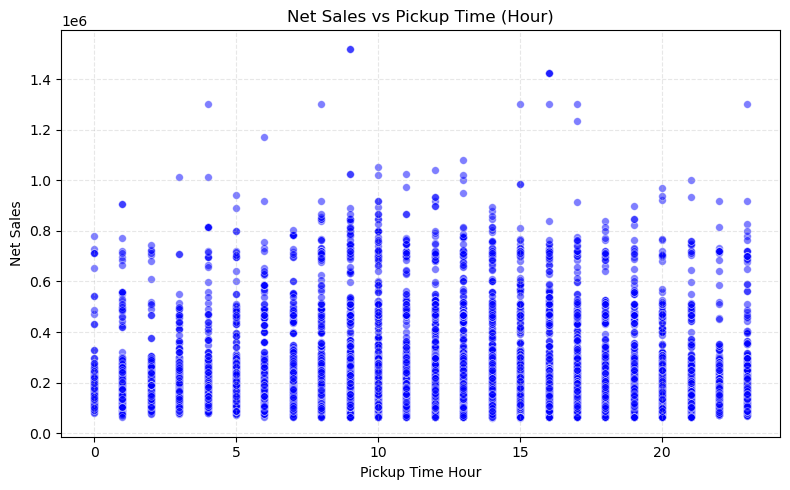

In [32]:
# Scatterplot: Net Sales vs Pickup Time Hour

plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df, 
    x='Pickup_Time_Hour', 
    y='Net_Sales', 
    s=30, alpha=0.5, 
    color='blue', marker='o'
)
plt.title('Net Sales vs Pickup Time (Hour)')
plt.xlabel('Pickup Time Hour')
plt.ylabel('Net Sales')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


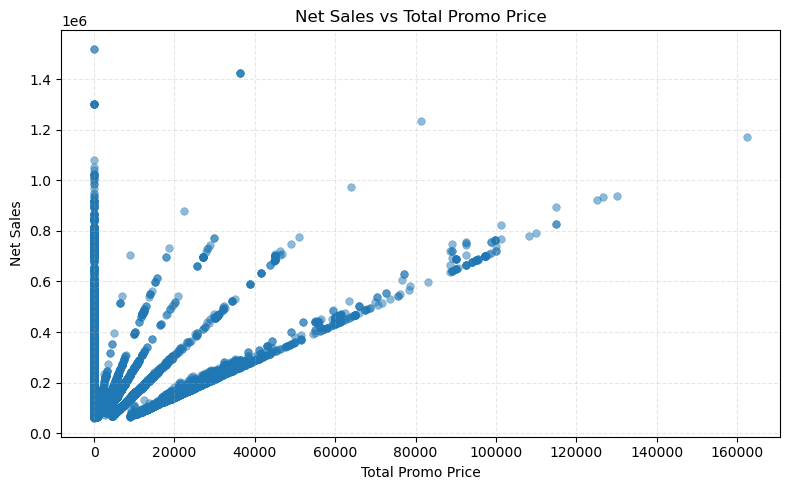

In [33]:
# Improved scatterplot with clearer points and better style

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Total_Promo_Price', y='Net_Sales', s=30, alpha=0.5, edgecolor=None)
plt.title('Net Sales vs Total Promo Price')
plt.xlabel('Total Promo Price')
plt.ylabel('Net Sales')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_8344\2271928739.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_sales_by_type, x='Booking_Type', y='Net_Sales', palette='pastel')


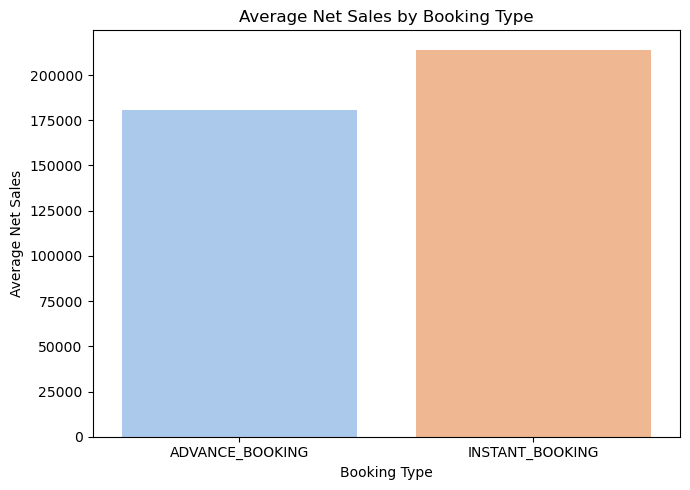

In [34]:
# Barplot: Average Net Sales by Booking Type

avg_sales_by_type = df.groupby('Booking_Type')['Net_Sales'].mean().reset_index()

plt.figure(figsize=(7, 5))
sns.barplot(data=avg_sales_by_type, x='Booking_Type', y='Net_Sales', palette='pastel')
plt.title('Average Net Sales by Booking Type')
plt.xlabel('Booking Type')
plt.ylabel('Average Net Sales')
plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_8344\39606931.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Pickup_Time_Hour', palette='viridis')


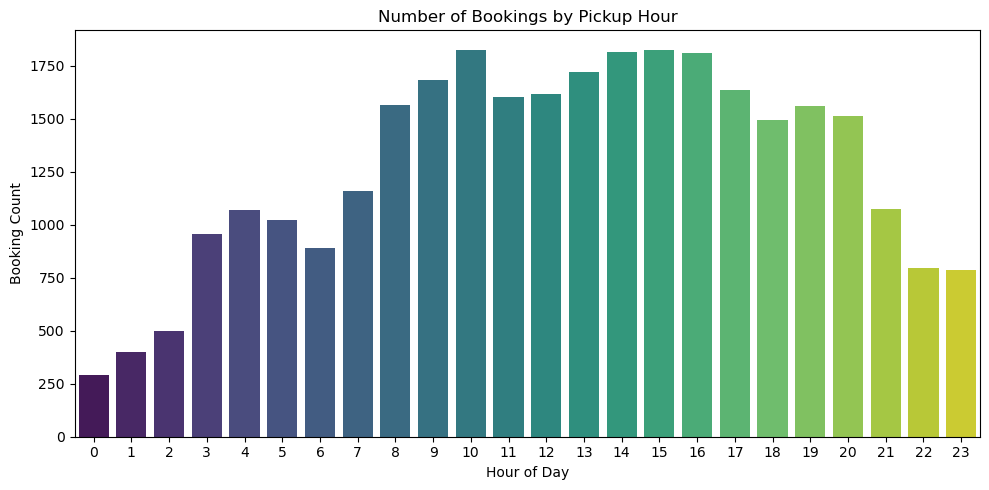

In [35]:
# Count plot: Bookings by Pickup Hour

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Pickup_Time_Hour', palette='viridis')
plt.title('Number of Bookings by Pickup Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Booking Count')
plt.tight_layout()
plt.show()


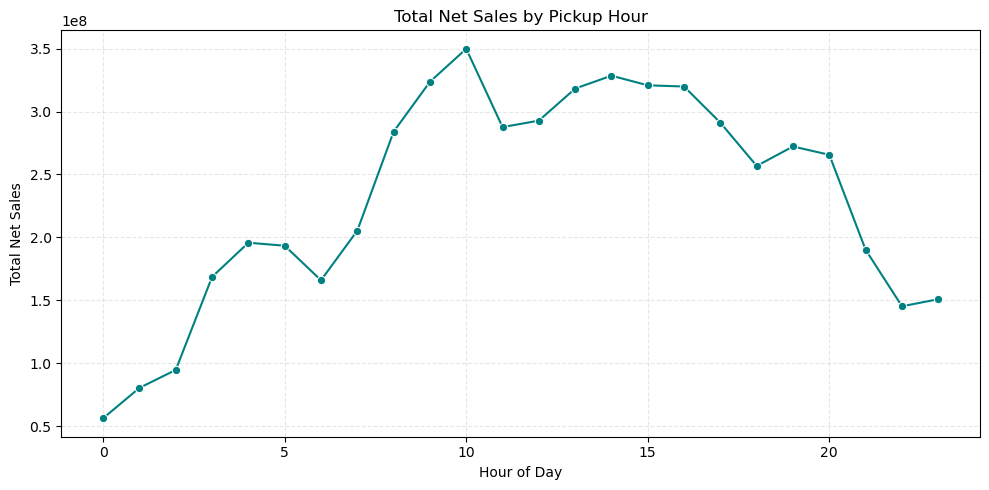

In [36]:
# Line plot: Total Net Sales by Pickup Hour

net_sales_by_hour = df.groupby('Pickup_Time_Hour')['Net_Sales'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=net_sales_by_hour, x='Pickup_Time_Hour', y='Net_Sales', marker='o', color='teal')
plt.title('Total Net Sales by Pickup Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Total Net Sales')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


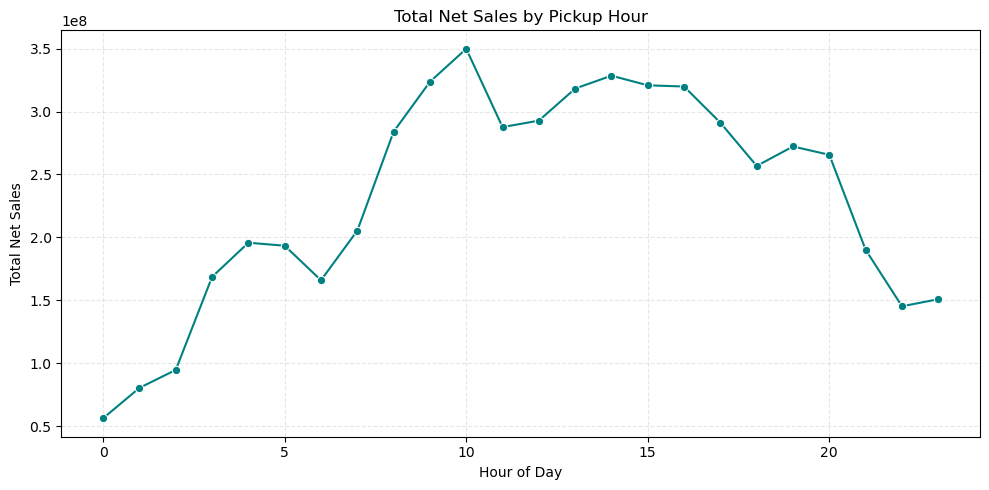

In [37]:
# Line plot: Total Net Sales by Pickup Hour

net_sales_by_hour = df.groupby('Pickup_Time_Hour')['Net_Sales'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=net_sales_by_hour, x='Pickup_Time_Hour', y='Net_Sales', marker='o', color='teal')
plt.title('Total Net Sales by Pickup Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Total Net Sales')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


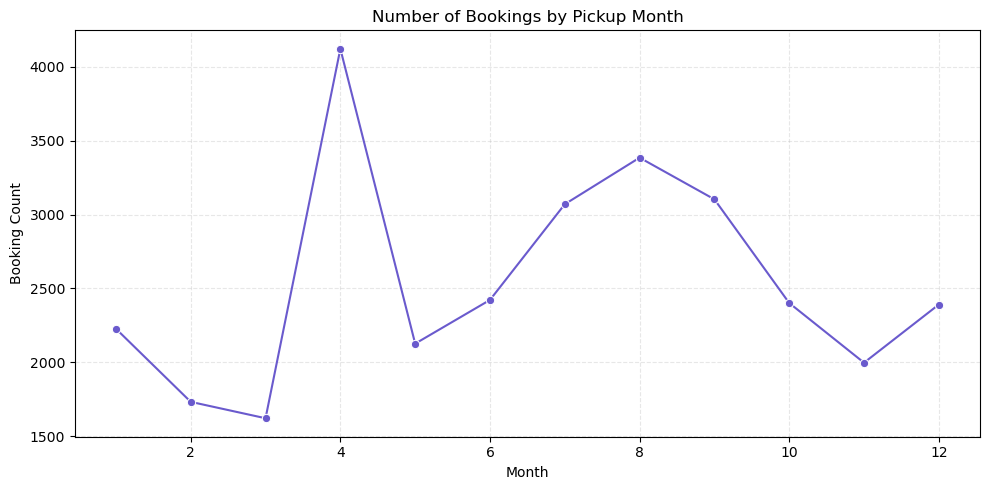

In [38]:
# Line plot: Total Bookings by Pickup Month

bookings_by_month = df['Pickup_Date_Month'].value_counts().sort_index().reset_index()
bookings_by_month.columns = ['Month', 'Booking_Count']

plt.figure(figsize=(10, 5))
sns.lineplot(data=bookings_by_month, x='Month', y='Booking_Count', marker='o', color='slateblue')
plt.title('Number of Bookings by Pickup Month')
plt.xlabel('Month')
plt.ylabel('Booking Count')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


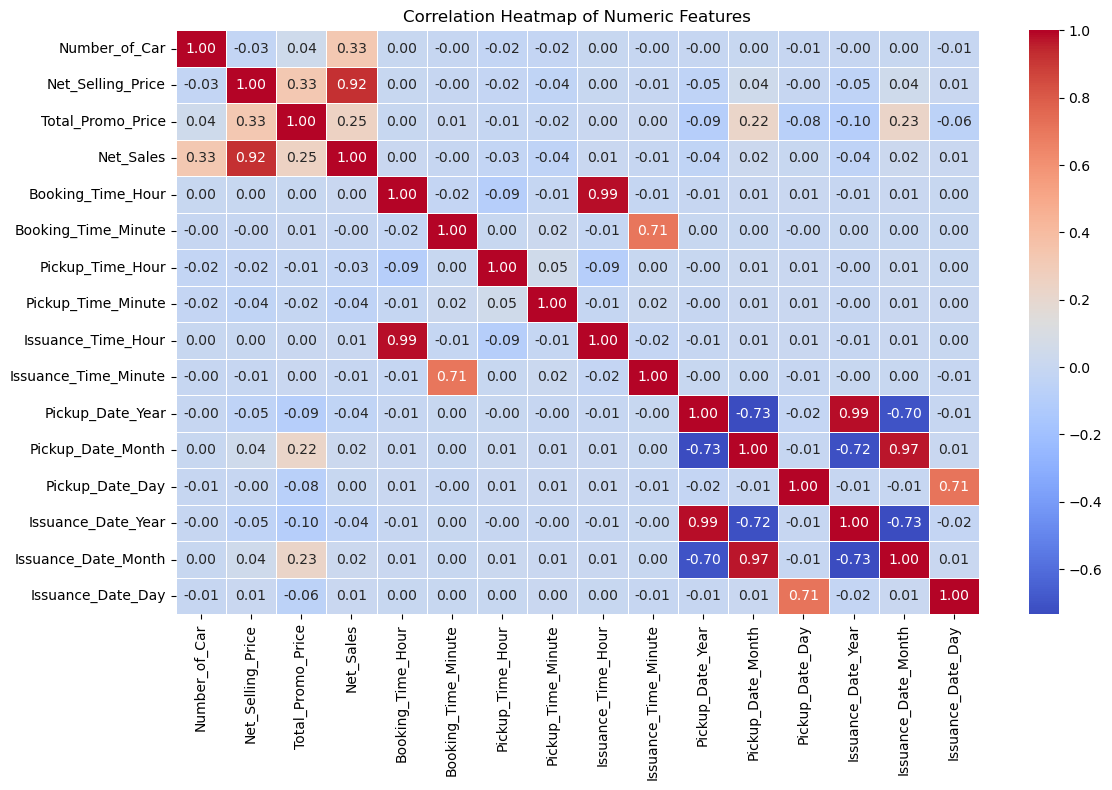

In [20]:
# Compute correlation matrix for numeric features

# Select numeric columns
numeric_cols = df.select_dtypes(include='number')

# Compute correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()


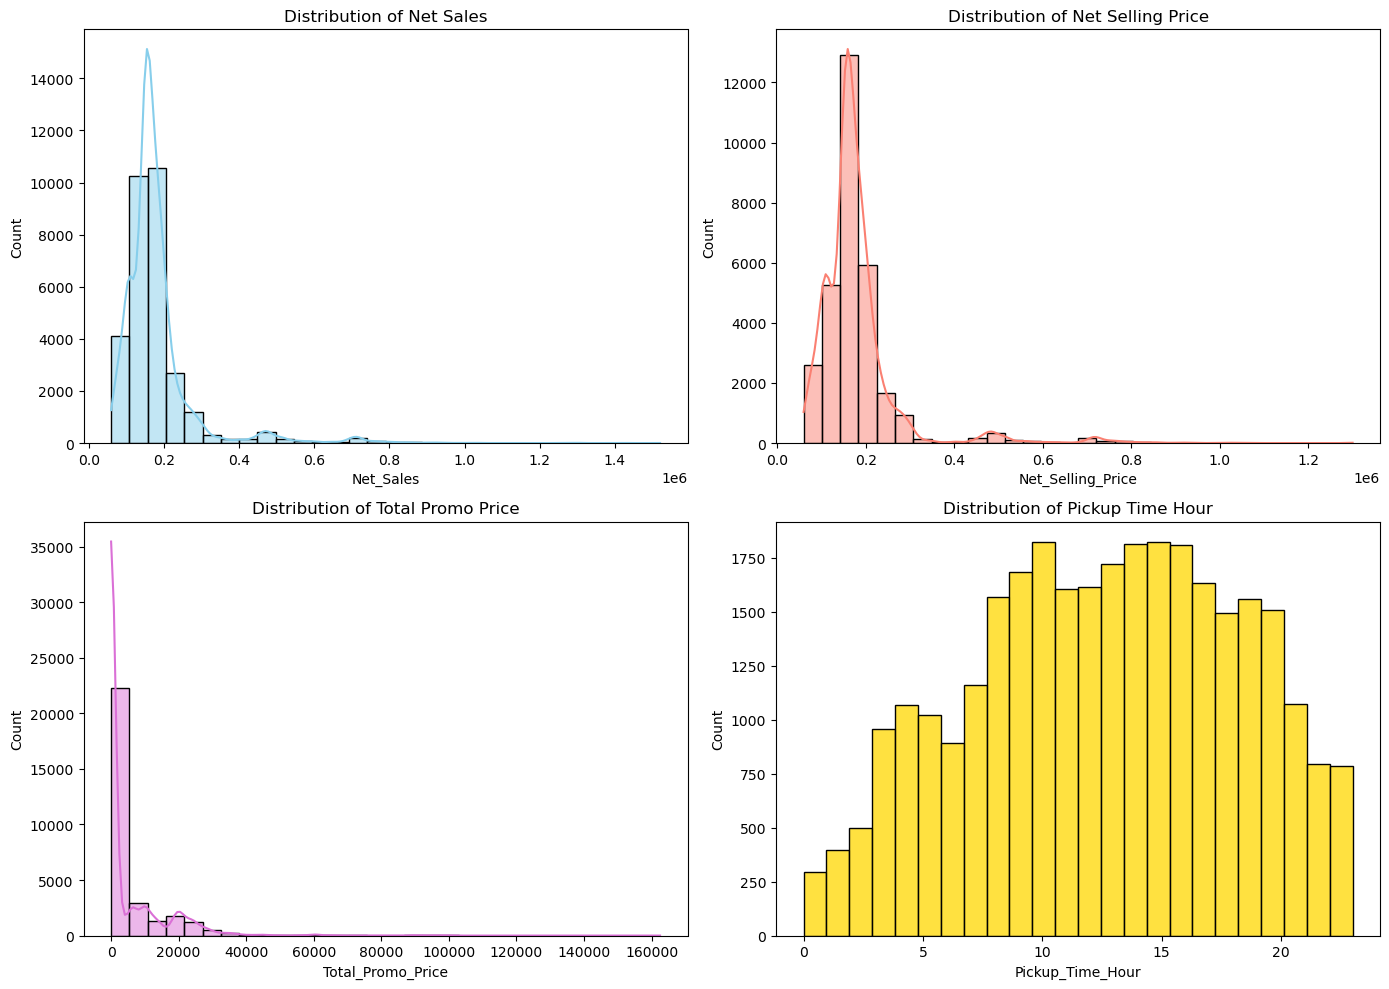

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Distribution of Net Sales
sns.histplot(df['Net_Sales'], bins=30, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Net Sales')

# 2. Distribution of Net Selling Price
sns.histplot(df['Net_Selling_Price'], bins=30, kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Distribution of Net Selling Price')

# 3. Distribution of Total Promo Price
sns.histplot(df['Total_Promo_Price'], bins=30, kde=True, ax=axes[1, 0], color='orchid')
axes[1, 0].set_title('Distribution of Total Promo Price')

# 4. Distribution of Pickup Time Hour
sns.histplot(df['Pickup_Time_Hour'], bins=24, kde=False, ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Distribution of Pickup Time Hour')

plt.tight_layout()
plt.show()